# Lab | Imbalanced data

## Load the dataset and explore the variables.

In [1]:
import pymysql
from sqlalchemy import create_engine
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import getpass
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

In [2]:
df=pd.read_csv('customer_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [6]:
df.drop(['customerID'],axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df=df.drop_duplicates()
#there are not duplicates

## Extract the independent variables and scale them.

In [8]:
data=df[['tenure','SeniorCitizen','MonthlyCharges','Churn']]

In [9]:
data

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [10]:
# encode category
def y_num(y):
    if y == 'Yes':
        return 1
    else:
        return 0

In [11]:
data['Churn']=data['Churn'].apply(y_num)

C:\Users\wanga\AppData\Local\Temp/ipykernel_3228/3575097860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn']=data['Churn'].apply(y_num)


In [12]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [15]:
y=data['Churn']
X=data.drop('Churn',axis=1)
X_num=X.select_dtypes(include=np.number)#or include=number

In [16]:
X_num.head(1)

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85


In [22]:
#Scaling the varibles with RobustScaler
scaler=RobustScaler()
scaler.fit(X_num)
X_num_scaled=pd.DataFrame(scaler.transform(X_num),columns=X_num.columns)

In [23]:
X_full=pd.concat([X_num_scaled], axis=1)

In [24]:
X_full.shape

(7043, 3)

In [25]:
y.shape

(7043,)

In [26]:
X_full.head(1)

,tenure,SeniorCitizen,MonthlyCharges
0,-0.608696,0.0,-0.74517


## Build the logistic regression model.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y,test_size = 0.45, random_state = 40)

In [28]:
classification = LogisticRegression(max_iter=500)

In [29]:
classification.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [30]:
y_test_pred=classification.predict(X_test)

In [31]:
accuracy_score(y_test,y_test_pred)

0.7889589905362776

## Evaluate the model.
- The accuracy of the model is high
## Even a simple model will give us more than 70% accuracy. Why?
- Because we don't have a big variarity of features and there the y has an imbalanced data values with a tendency of more No than Yes.


In [32]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

- Detecting Multicollinearity with VIF:
  there is not multicollinearity between the variables

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data[['tenure', 'MonthlyCharges', 'SeniorCitizen']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

          feature       VIF
0          tenure  2.617403
1  MonthlyCharges  2.924996
2   SeniorCitizen  1.256364


In [34]:
# Check correlation between tenure and monthlycharges
feat_crosstab=pd.crosstab(df['tenure'],df['MonthlyCharges'], margins=False)
feat_crosstab

MonthlyCharges,18.25,18.40,18.55,18.70,18.75,18.80,18.85,18.90,18.95,19.00,...,117.35,117.45,117.50,117.60,117.80,118.20,118.35,118.60,118.65,118.75
tenure,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from scipy.stats import chi2_contingency
chi2_contingency(feat_crosstab, correction=False)

(117599.75576015131,
 9.036150061814391e-14,
 114048,
 array([[0.00156183, 0.00156183, 0.00156183, ..., 0.00312367, 0.00156183,
         0.00156183],
        [0.08703677, 0.08703677, 0.08703677, ..., 0.17407355, 0.08703677,
         0.08703677],
        [0.03379242, 0.03379242, 0.03379242, ..., 0.06758484, 0.03379242,
         0.03379242],
        ...,
        [0.01689621, 0.01689621, 0.01689621, ..., 0.03379242, 0.01689621,
         0.01689621],
        [0.02413744, 0.02413744, 0.02413744, ..., 0.04827488, 0.02413744,
         0.02413744],
        [0.05139855, 0.05139855, 0.05139855, ..., 0.1027971 , 0.05139855,
         0.05139855]]))

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [37]:
confusion_matrix(y_test,y_test_pred)

array([[2120,  211],
       [ 458,  381]], dtype=int64)

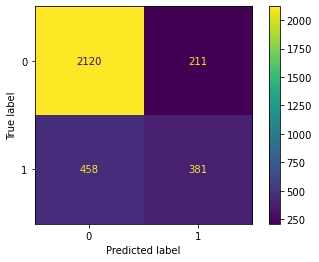

In [38]:
cmx=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

## Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [39]:
from imblearn.over_sampling import RandomOverSampler

In [40]:
ros=RandomOverSampler()
X_ros,y_ros=ros.fit_resample(X_full,y)

In [41]:
y_ros.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [42]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros,test_size = 0.45, random_state = 40)
classification = LogisticRegression(max_iter=500)
classification.fit(X_train_ros,y_train_ros)
y_test_pred_ros=classification.predict(X_test_ros)
accuracy_score(y_test_ros,y_test_pred_ros)

0.722138715911531

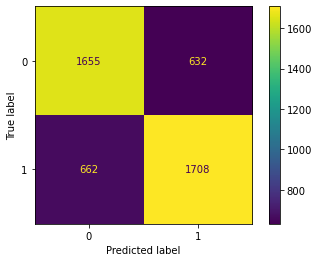

In [43]:
cm_ros=confusion_matrix(y_test_ros,y_test_pred_ros)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_ros)
disp.plot();

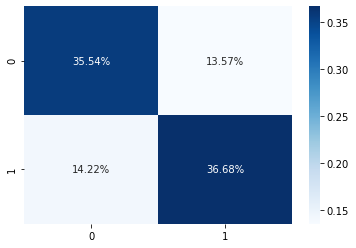

In [44]:
sns.heatmap(cm_ros/np.sum(cm_ros), annot=True, fmt='.2%',cmap='Blues');

## Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

- SMOTE method gives a slightly better balanced variables compared to TomekLinks.

In [45]:
from imblearn.under_sampling import RandomUnderSampler

In [46]:
rus=RandomUnderSampler()
X_rus,y_rus=rus.fit_resample(X_full,y)

In [47]:
y_rus.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [48]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus,test_size = 0.45, random_state = 40)
classification = LogisticRegression(max_iter=500)
classification.fit(X_train_rus,y_train_rus)
y_test_pred_rus=classification.predict(X_test_rus)
accuracy_score(y_test_rus,y_test_pred_rus)

0.7546048722519311

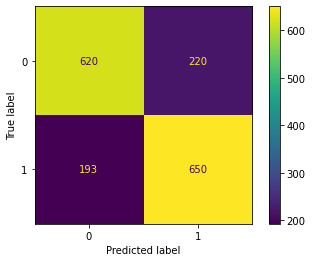

In [49]:
cm_rus=confusion_matrix(y_test_rus,y_test_pred_rus)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_rus)
disp.plot();


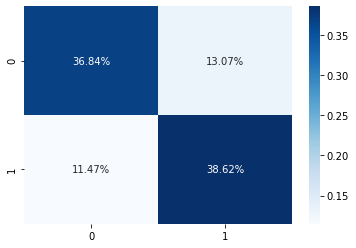

In [50]:
sns.heatmap(cm_rus/np.sum(cm_rus), annot=True, fmt='.2%',cmap='Blues');

## AUC - area under the curve

In [56]:
from sklearn.metrics import roc_auc_score,roc_curve

In [60]:
y_pred_probs=classification.predict_proba(X_test_ros)[::,1]

In [61]:
y_pred_probs

array([0.02732519, 0.81276881, 0.83364374, ..., 0.39070898, 0.77460181,
       0.80483518])

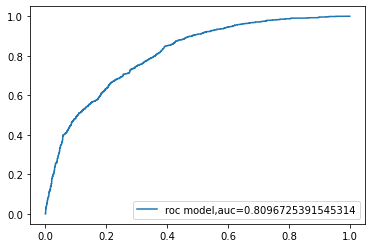

In [62]:
fpr,tpr,_=roc_curve(y_test_ros,y_pred_probs)
auc=roc_auc_score(y_test_ros,y_pred_probs)
plt.plot(fpr,tpr,label='roc model,auc='+str(auc))
plt.legend(loc=4)
plt.show();

In [63]:
y_pred_raw_probs=classification.predict_proba(X_test)[::,1] 

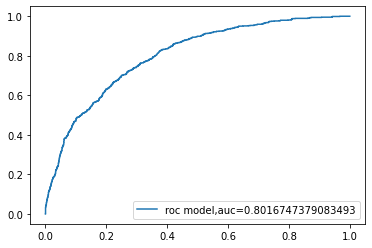

In [64]:
fpr,tpr,_=roc_curve(y_test,y_pred_raw_probs)
auc=roc_auc_score(y_test,y_pred_raw_probs)
plt.plot(fpr,tpr,label='roc model,auc='+str(auc))
plt.legend(loc=4)
plt.show();